In [1]:
import pandas as pd

# Sample data for 12 Indian cricket batsmen including Hardik Pandya
data = {
    'Player': [
        'Virat Kohli', 'Rohit Sharma', 'Shikhar Dhawan',
        'KL Rahul', 'Sachin Tendulkar', 'Virender Sehwag',
        'Gautam Gambhir', 'Sourav Ganguly', 'Ravindra Jadeja',
        'Yuvraj Singh', 'MS Dhoni', 'Hardik Pandya'
    ],
    'Role': [
        'Batsman', 'Batsman', 'Boller', 'Batsman', 'Batsman', 'Batsman',
        'Batsman', 'Batsman', 'All-Rounder', 'Batsman', 'Batsman', 'All-Rounder'
    ],
    'Matches': [254, 227, 142, 38, 463, 104, 147, 311, 344, 304, 350, 65],
    'Runs': [12169, 9205, 5977, 1461, 18426, 8273, 5238, 11363, 10889, 8701, 10773, 1784],
    'Centuries': [43, 29, 17, 5, 49, 15, 11, 22, 12, 14, 10, 0],
    'Batting_Average': [59.07, 49.27, 45.02, 42.48, 44.83, 35.05, 39.68, 41.02, 39.16, 36.55, 50.57, 29.78],
}

indian_batsmen_data = pd.DataFrame(data)

# Save the dataset to a CSV file
indian_batsmen_data.to_csv('indian_batsmen_data.csv', index=False)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  # Example classifier, replace as needed

# Load the dataset
data = pd.read_csv('/content/indian_batsmen_data.csv')

data

,Player,Role,Matches,Runs,Centuries,Batting_Average
0,Virat Kohli,Batsman,254,12169,43,59.07
1,Rohit Sharma,Batsman,227,9205,29,49.27
2,Shikhar Dhawan,Boller,142,5977,17,45.02
3,KL Rahul,Batsman,38,1461,5,42.48
4,Sachin Tendulkar,Batsman,463,18426,49,44.83
5,Virender Sehwag,Batsman,104,8273,15,35.05
6,Gautam Gambhir,Batsman,147,5238,11,39.68
7,Sourav Ganguly,Batsman,311,11363,22,41.02
8,Ravindra Jadeja,All-Rounder,344,10889,12,39.16
9,Yuvraj Singh,Batsman,304,8701,14,36.55


In [4]:
data.head()

,Player,Role,Matches,Runs,Centuries,Batting_Average
0,Virat Kohli,Batsman,254,12169,43,59.07
1,Rohit Sharma,Batsman,227,9205,29,49.27
2,Shikhar Dhawan,Boller,142,5977,17,45.02
3,KL Rahul,Batsman,38,1461,5,42.48
4,Sachin Tendulkar,Batsman,463,18426,49,44.83


In [5]:
len(data)


12

In [6]:
# Assuming we are predicting a binary outcome (e.g., century or not)
# Create a binary target variable (e.g., 1 for century, 0 for no century)
data['Century'] = (data['Centuries'] > 0).astype(int)



In [7]:
# Select features and target variable
features = ['Matches', 'Runs', 'Batting_Average']
X = data[features]
y = data['Century']



In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classifier (e.g., Logistic Regression)
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)



LogisticRegression(random_state=42)

In [10]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


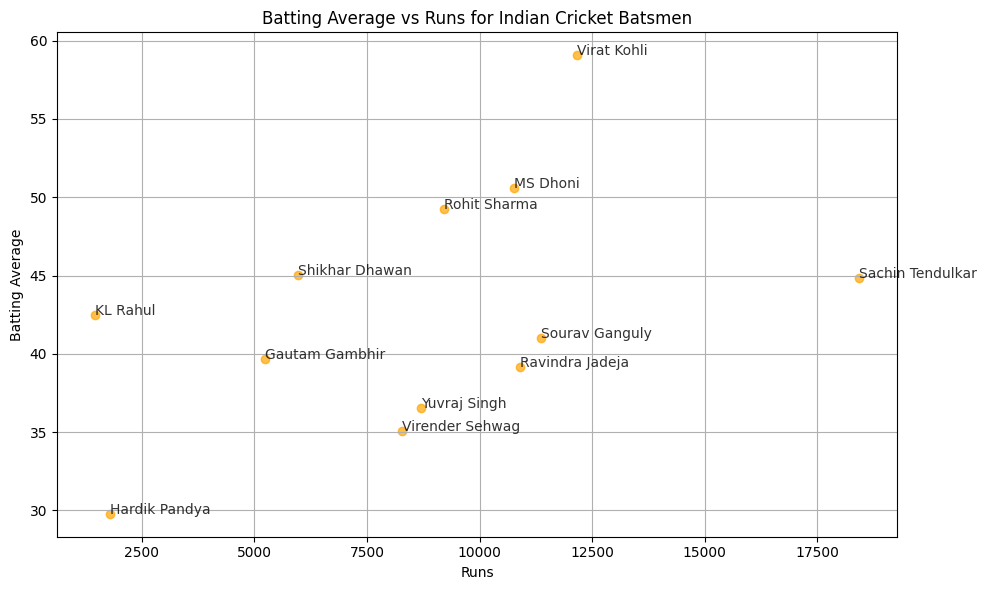

In [14]:
batting_average = indian_batsmen_data['Batting_Average']
runs = indian_batsmen_data['Runs']
players = indian_batsmen_data['Player']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(runs, batting_average, c='orange', marker='o', alpha=0.7)

# Label each point with player names
for i, player in enumerate(players):
    plt.annotate(player, (runs[i], batting_average[i]), fontsize=10, alpha=0.8)

plt.xlabel('Runs')
plt.ylabel('Batting Average')
plt.title('Batting Average vs Runs for Indian Cricket Batsmen')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
